In [1]:
# Quick inspection of the raw file
with open('../data/MachineLearningRating_v3.txt', 'r') as f:
    for i in range(5):  # Print first 5 lines
        print(f.readline())

UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims

145249|12827|2015-03-01 00:00:00|True|  |Close Corporation|Mr|English|First National Bank|Current account|Not specified|Not specified|South Africa|Gauteng|1459|Rand East|Rand East|Mobility - Motor|44069150|Passenger Vehicle|2004|MERCEDES-BENZ|E 240|6|2597|130|S/D|4|6/2002|119300|Yes|No|119300|More than 6 months||||||0.01|Monthly|25|Mobility - Windscree

In [2]:
import pandas as pd
def smart_file_loader(file_path, preview_lines=10):
    """Smart loader that tries multiple methods and shows preview"""
    
    # First show raw content
    print(f"\n{' RAW FILE CONTENT ':=^50}")
    with open(file_path, 'r') as f:
        for i in range(preview_lines):
            line = f.readline()
            if not line: break
            print(f"{i+1:>2}: {line.strip()}")
    
    # Try different loading methods
    methods = [
        ('csv (comma)', lambda: pd.read_csv(file_path, nrows=5)),
        ('tsv (tab)', lambda: pd.read_csv(file_path, delimiter='\t', nrows=5)),
        ('pipe-delimited', lambda: pd.read_csv(file_path, delimiter='|', nrows=5)),
        ('semicolon', lambda: pd.read_csv(file_path, delimiter=';', nrows=5)),
        ('read_table', lambda: pd.read_table(file_path, nrows=5)),
        ('fixed-width', lambda: pd.read_fwf(file_path, nrows=5))
    ]
    
    print(f"\n{' TRYING LOAD METHODS ':=^50}")
    for name, loader in methods:
        try:
            df = loader()
            print(f"\n✅ Success with {name}:")
            print(df.head())
            return df
        except Exception as e:
            print(f"❌ Failed with {name}: {str(e)}")
            continue
    
    raise ValueError("Could not automatically determine file format")

# Usage
df = smart_file_loader('../data/MachineLearningRating_v3.txt')


================ RAW FILE CONTENT ================
 1: UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims
 2: 145249|12827|2015-03-01 00:00:00|True|  |Close Corporation|Mr|English|First National Bank|Current account|Not specified|Not specified|South Africa|Gauteng|1459|Rand East|Rand East|Mobility - Motor|44069150|Passenger Vehicle|2004|MERCEDES-BENZ|E 240|6|2597|130|S/D|4|6/2002|119300|Yes|No|119300|M

In [3]:
# Calculate descriptive statistics:
df.describe()

,UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims
count,5
unique,5
top,145249|12827|2015-03-01 00:00:00|True| |Close...
freq,1


In [4]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                       

In [5]:
# Step 4: Data Quality Assessment
# Check for missing values:
df.isnull().sum()

UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims    0
dtype: int64

In [6]:
print("Columns in DataFrame:")
print(df.columns.tolist())

print("\nFirst 5 rows:")
print(df.head())

Columns in DataFrame:
['UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims']

First 5 rows:
  UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|Vehic

In [7]:
# Look for columns containing 'premium' or 'price' in their names
premium_cols = [col for col in df.columns if 'premium' in col.lower() or 'price' in col.lower()]
print("Possible premium columns:", premium_cols)

# Or look for numeric columns that might contain financial data
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols.tolist())

Possible premium columns: ['UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims']
Numeric columns: []


In [8]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims    0
dtype: int64


In [9]:
# Get column names from first line
with open('../data/MachineLearningRating_v3.txt', 'r') as f:
    cols = f.readline().strip().split('|')

# Load data with explicit column names
df = pd.read_csv('../data/MachineLearningRating_v3.txt', 
                 delimiter='|', 
                 skiprows=1, 
                 names=cols,
                 na_values=[' ', '.000000000000'])

# Now all columns should be properly separated
print(df.head())

C:\Users\fre\AppData\Local\Temp\ipykernel_17400\1438433283.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt',


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

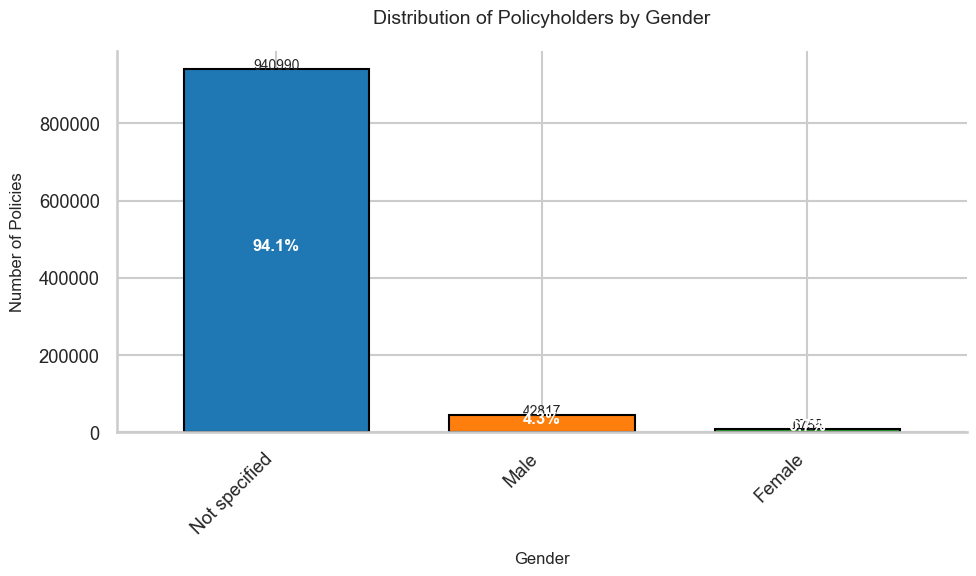

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context for better visuals
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

# Create value counts and plot
gender_counts = df['Gender'].value_counts()

# Create figure
plt.figure(figsize=(10, 6))

# Create bar plot with customization
ax = gender_counts.plot(kind='bar', 
                       color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Custom colors
                       edgecolor='black', 
                       width=0.7)

# Add titles and labels
plt.title('Distribution of Policyholders by Gender', 
          fontsize=14, 
          pad=20)
plt.xlabel('Gender', 
           fontsize=12, 
           labelpad=10)
plt.ylabel('Number of Policies', 
           fontsize=12, 
           labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add data labels on top of bars
for i, v in enumerate(gender_counts):
    ax.text(i, v + 5, str(v), 
            ha='center', 
            fontsize=10)

# Add percentage annotations
total = len(df)
for i, v in enumerate(gender_counts):
    percentage = f'{(v/total)*100:.1f}%'
    ax.text(i, v/2, percentage, 
            ha='center', 
            color='white',
            fontweight='bold',
            fontsize=12)

# Remove top and right spines
sns.despine()

# Adjust layout
plt.tight_layout()

# Save high-quality version
plt.savefig('../outputs/distribution_of_policyholders_by_gender.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

C:\Users\fre\AppData\Local\Temp\ipykernel_17400\1113232880.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_counts.index,


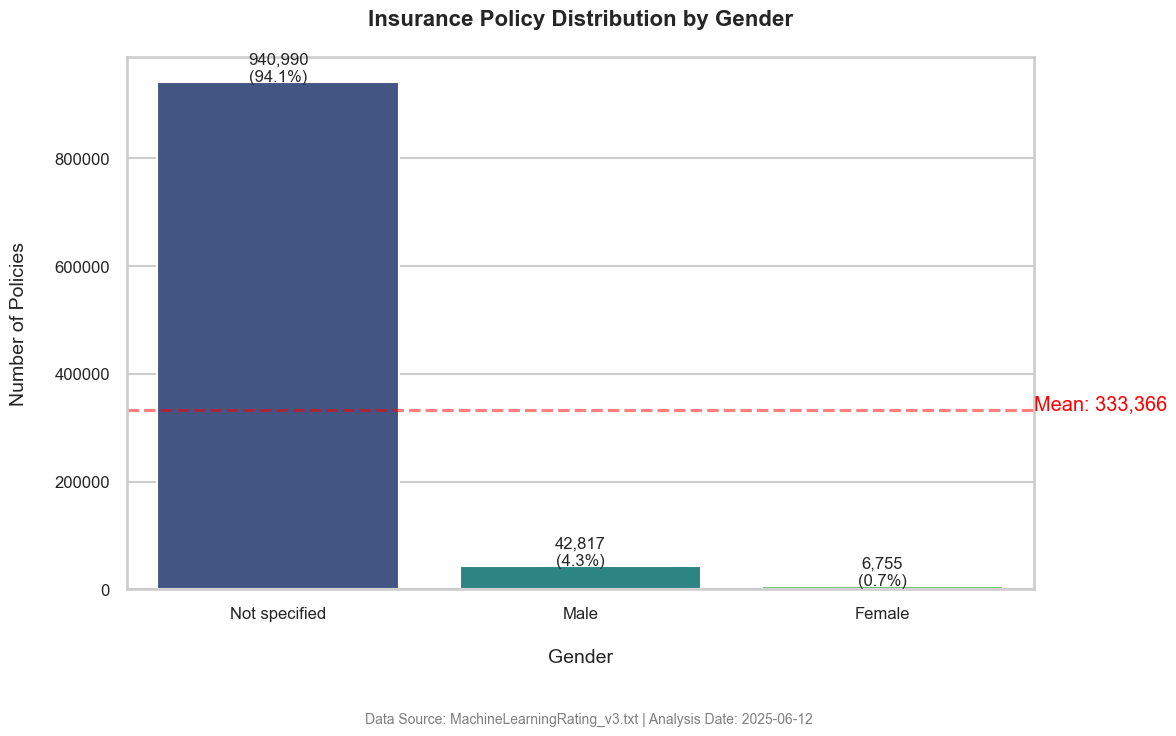

In [23]:
# Get value counts
gender_counts = df['Gender'].value_counts()

# Create figure
plt.figure(figsize=(12, 7))

# Create bar plot with seaborn for better aesthetics
ax = sns.barplot(x=gender_counts.index, 
                 y=gender_counts.values,
                 palette="viridis",
                 saturation=0.8)

# Add title and labels
plt.title('Insurance Policy Distribution by Gender\n', 
          fontsize=16, 
          fontweight='bold')
plt.xlabel('\nGender', 
           fontsize=14)
plt.ylabel('Number of Policies\n', 
           fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}\n({p.get_height()/len(df)*100:.1f}%)", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=12)

# Add reference line at mean
mean_val = len(df)/len(gender_counts)
plt.axhline(y=mean_val, 
            color='red', 
            linestyle='--', 
            alpha=0.5)
plt.text(len(gender_counts)-0.5, mean_val+5, 
         f'Mean: {mean_val:,.0f}', 
         color='red')

# Add footnote
plt.figtext(0.5, -0.05, 
            "Data Source: MachineLearningRating_v3.txt | Analysis Date: " + pd.Timestamp.today().strftime('%Y-%m-%d'),
            ha="center", 
            fontsize=10, 
            color='gray')

# Adjust layout
plt.tight_layout()

# Save high-quality version
plt.savefig('../outputs/insurance_policydistribution_by_gender.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

C:\Users\fre\AppData\Local\Temp\ipykernel_17400\4180280377.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


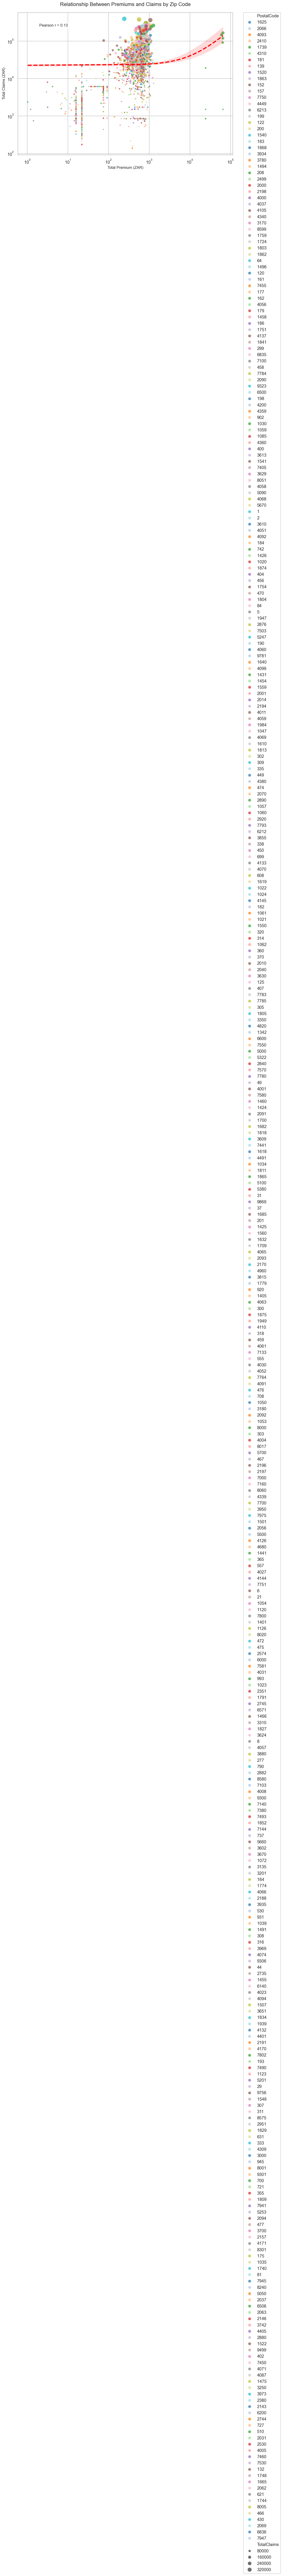

In [28]:
# Bivariate/Multivariate Analysis - Premium vs Claims by ZipCode
# First ensure data is clean
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')
df['PostalCode'] = df['PostalCode'].astype(str)

# Filter out zeros for better visualization
analysis_df = df[(df['TotalPremium'] > 0) & (df['TotalClaims'] > 0)]

plt.figure(figsize=(12, 8))

# Create scatter plot with hue by PostalCode
scatter = sns.scatterplot(data=analysis_df, 
                         x='TotalPremium', 
                         y='TotalClaims',
                         hue='PostalCode',
                         size='TotalClaims',  # Size by claim amount
                         sizes=(20, 200),
                         alpha=0.7,
                         palette="tab20")

# Add regression line
sns.regplot(data=analysis_df, 
           x='TotalPremium', 
           y='TotalClaims', 
           scatter=False,
           color='red',
           line_kws={'linestyle':'--'})

# Customize plot
plt.title('Relationship Between Premiums and Claims by Zip Code', fontsize=16, pad=20)
plt.xlabel('Total Premium (ZAR)', fontsize=12)
plt.ylabel('Total Claims (ZAR)', fontsize=12)
plt.xscale('log')  # Log scale if data is skewed
plt.yscale('log')

# Move legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Add correlation coefficient
corr = analysis_df['TotalPremium'].corr(analysis_df['TotalClaims'])
plt.text(0.1, 0.9, f'Pearson r = {corr:.2f}', 
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()

plt.show()

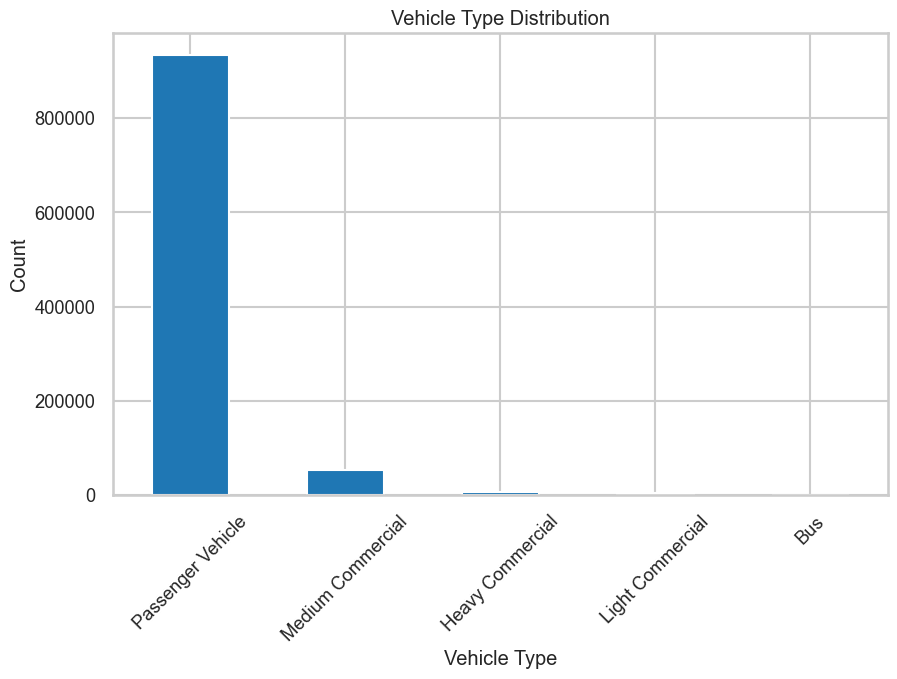


VehicleType counts:
VehicleType
Passenger Vehicle    933598
Medium Commercial     53985
Heavy Commercial       7401
Light Commercial       3897
Bus                     665
Name: count, dtype: int64


In [30]:
# Plot bar chart for VehicleType
plt.figure(figsize=(10, 6))
df['VehicleType'].value_counts().plot(kind='bar')
plt.title('Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Save high-quality version
plt.savefig('../outputs/vehicle_distribution2.png', dpi=600)
plt.show()

# Value counts
print("\nVehicleType counts:")
print(df['VehicleType'].value_counts())

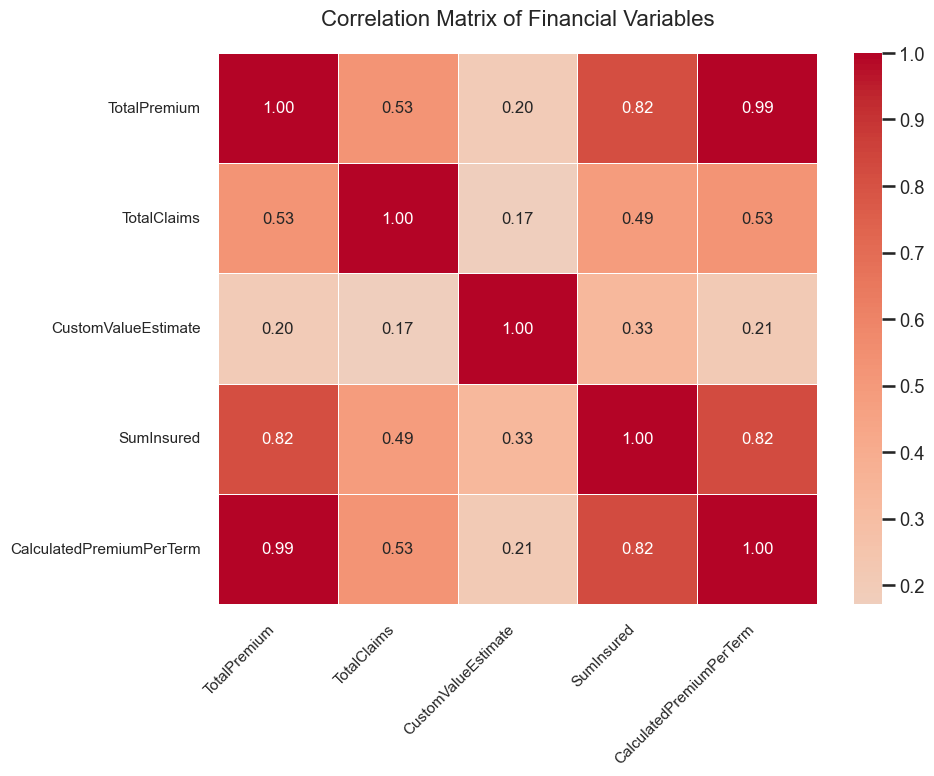

In [31]:
#  Enhanced Correlation Matrix
# Select numerical columns for correlation
numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured', 'CalculatedPremiumPerTerm']
corr_df = df[numerical_cols].apply(pd.to_numeric, errors='coerce').dropna()

plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(corr_df.corr(), 
           annot=True, 
           cmap='coolwarm', 
           center=0,
           fmt='.2f',
           linewidths=0.5,
           annot_kws={"size": 12})

plt.title('Correlation Matrix of Financial Variables', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig('../outputs/correlationMatrix_of_financial_variables.png', dpi=600)
plt.show()

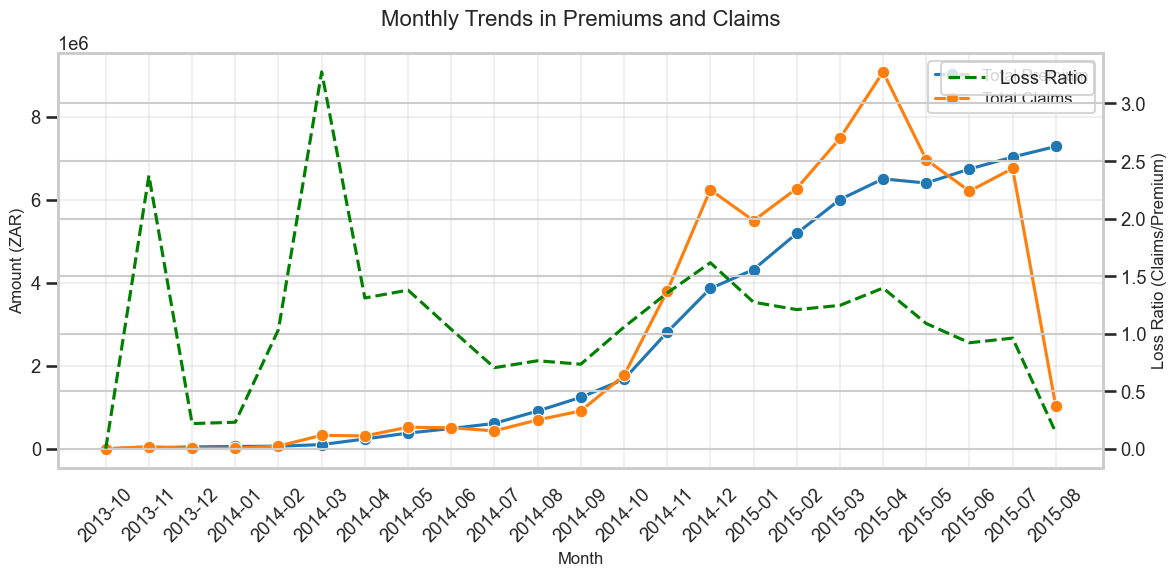

In [32]:
# Monthly Trends Visualization
# Convert to datetime and extract month
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['Month'] = df['TransactionMonth'].dt.to_period('M')

# Group by month
monthly_data = df.groupby('Month').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).reset_index()
monthly_data['Month'] = monthly_data['Month'].astype(str)

plt.figure(figsize=(12, 6))

# Create line plot
sns.lineplot(data=monthly_data, x='Month', y='TotalPremium', label='Total Premium', marker='o')
sns.lineplot(data=monthly_data, x='Month', y='TotalClaims', label='Total Claims', marker='o')

# Customize plot
plt.title('Monthly Trends in Premiums and Claims', fontsize=16, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount (ZAR)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add secondary axis for ratio
ax2 = plt.gca().twinx()
ax2.plot(monthly_data['Month'], 
        monthly_data['TotalClaims']/monthly_data['TotalPremium'], 
        color='green', 
        linestyle='--', 
        label='Loss Ratio')
ax2.set_ylabel('Loss Ratio (Claims/Premium)', fontsize=12)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig('../outputs/trend_premiums_and_claims.png', dpi=600)
plt.show()

In [33]:
# First, check what columns you actually have
print("Available columns:", df.columns.tolist())

# Look for potential geographic columns (case insensitive)
geo_cols = [col for col in df.columns if 'province' in col.lower() or 'region' in col.lower() or 'location' in col.lower()]
print("Potential geographic columns:", geo_cols)

Available columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'Month']
Potential geographic columns: ['Province']


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the data with correct pipe delimiter
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')

# Verify columns are now properly separated
print("Properly separated columns:", df.columns.tolist())

C:\Users\fre\AppData\Local\Temp\ipykernel_17400\1005523995.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')


Properly separated columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


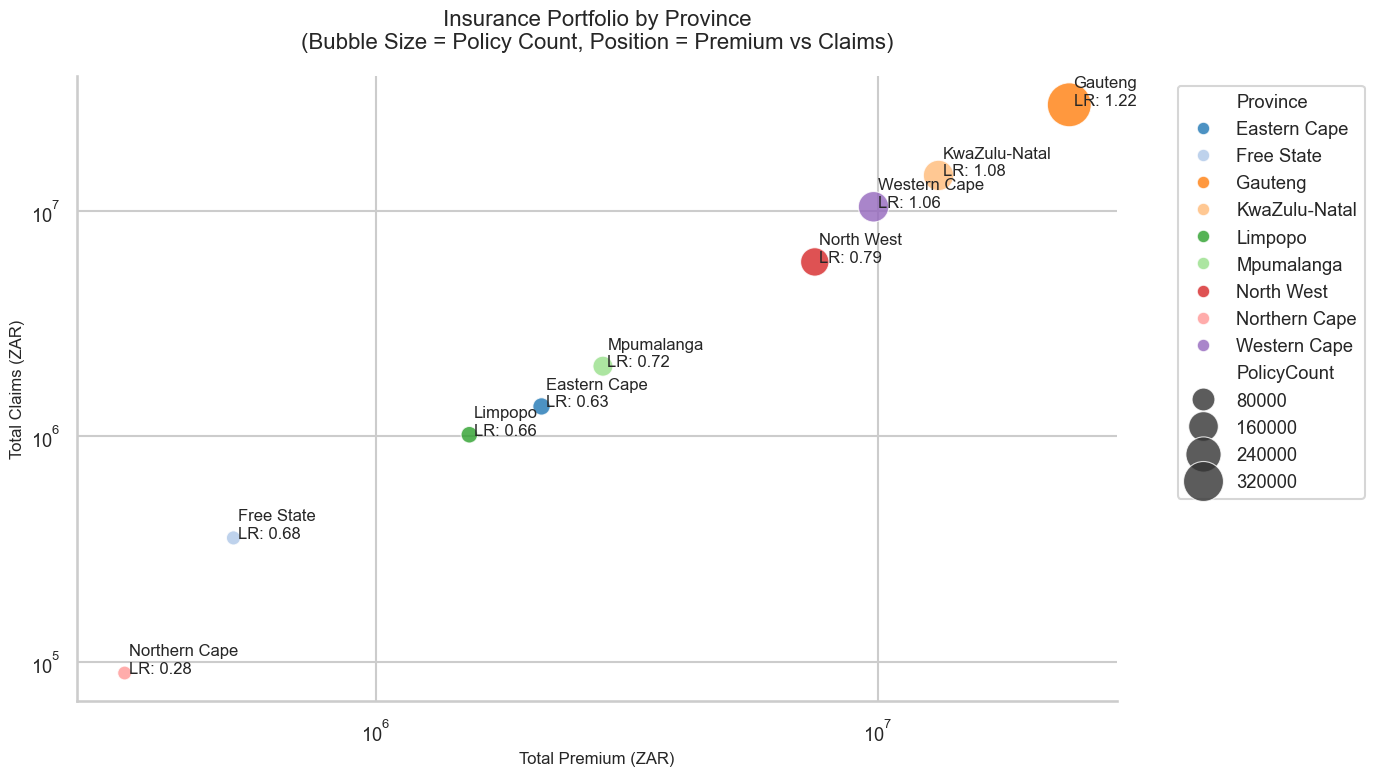

In [35]:
# Geographic Distribution of Premiums by Province
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 8))

# Aggregate data by province
geo_data = df.groupby('Province').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).rename(columns={'PolicyID': 'PolicyCount'}).reset_index()

# Create bubble chart with size=policy count, color=loss ratio
geo_data['LossRatio'] = geo_data['TotalClaims'] / geo_data['TotalPremium']

scatter = sns.scatterplot(
    data=geo_data,
    x='TotalPremium',
    y='TotalClaims',
    size='PolicyCount',
    sizes=(100, 1000),
    hue='Province',
    palette='tab20',
    alpha=0.8
)

# Add annotations
for line in range(geo_data.shape[0]):
    plt.text(geo_data['TotalPremium'][line]*1.02, 
             geo_data['TotalClaims'][line],
             f"{geo_data['Province'][line]}\nLR: {geo_data['LossRatio'][line]:.2f}",
             horizontalalignment='left',
             size='small')

plt.title('Insurance Portfolio by Province\n(Bubble Size = Policy Count, Position = Premium vs Claims)', fontsize=16, pad=20)
plt.xlabel('Total Premium (ZAR)', fontsize=12)
plt.ylabel('Total Claims (ZAR)', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.savefig('../outputs/insurancePortfolio_by_province.png', dpi=600)
plt.show()

d:\AI-projects\Week3-Insurance-RiskAnalytics-and-PredictiveModeling\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\AI-projects\Week3-Insurance-RiskAnalytics-and-PredictiveModeling\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\AI-projects\Week3-Insurance-RiskAnalytics-and-PredictiveModeling\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs

<Figure size 1600x1000 with 0 Axes>

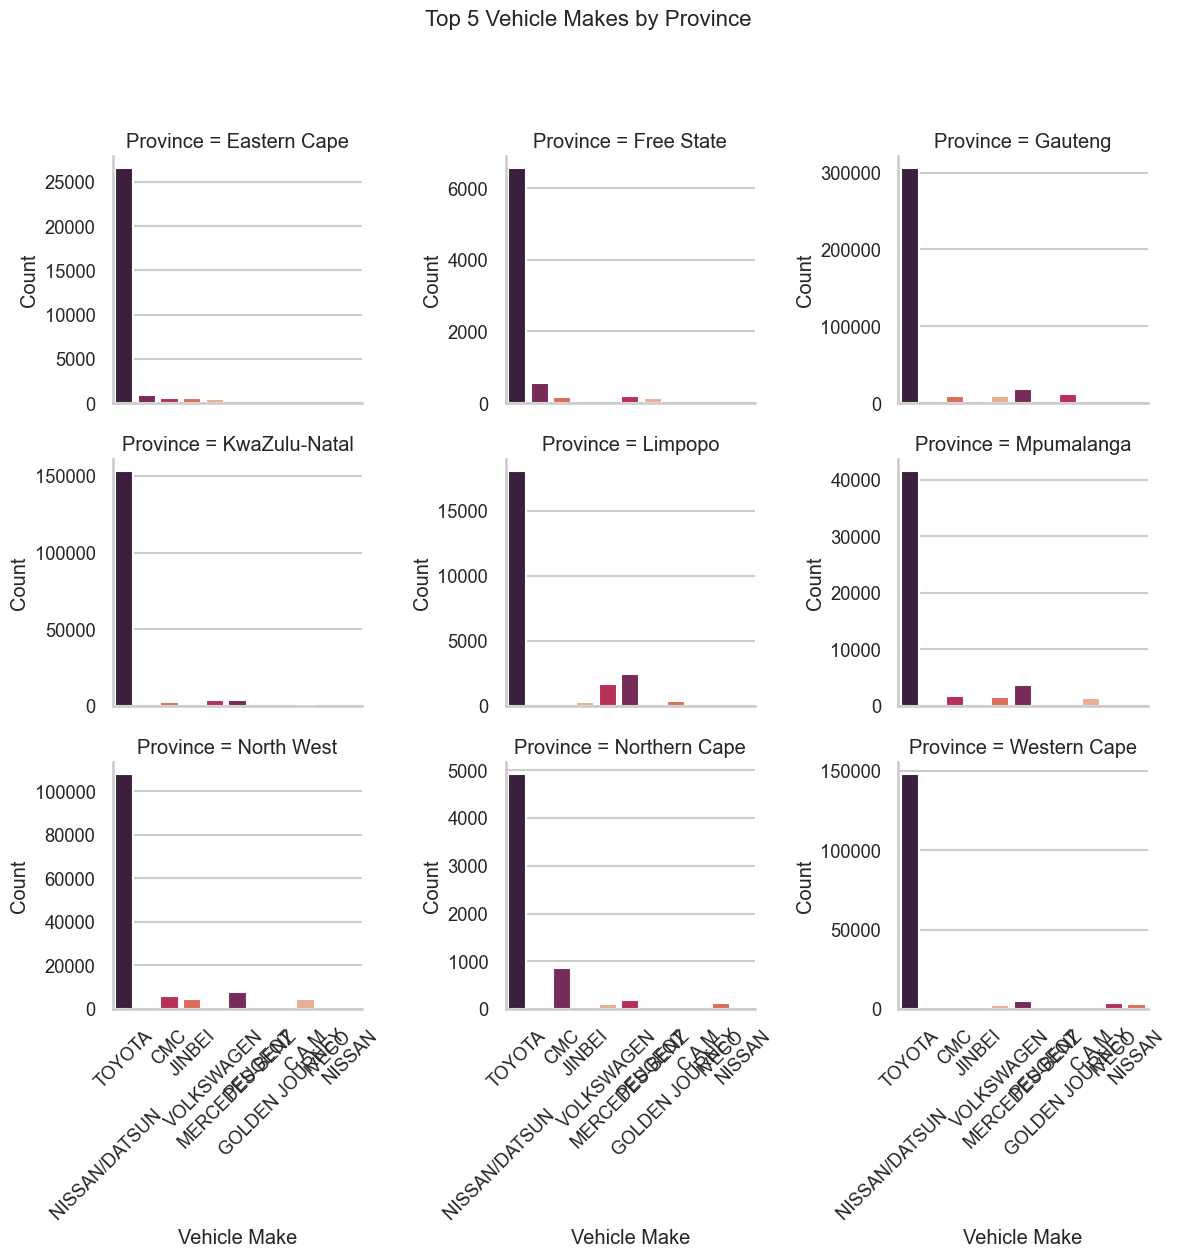

In [38]:
plt.figure(figsize=(16, 10))

# Get top 5 makes per province
top_makes = df.groupby(['Province', 'make']).size().groupby('Province', group_keys=False).nlargest(5).reset_index()

# Create facet grid
g = sns.FacetGrid(top_makes, col='Province', col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x='make', y=0, palette='rocket')

# Customize each subplot
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Vehicle Make')
    ax.set_ylabel('Count')

g.fig.suptitle('Top 5 Vehicle Makes by Province', y=1.05, fontsize=16)
plt.tight_layout()
plt.savefig('../outputs/top5Vehiclesmake_by_province.png', dpi=600)
plt.show()

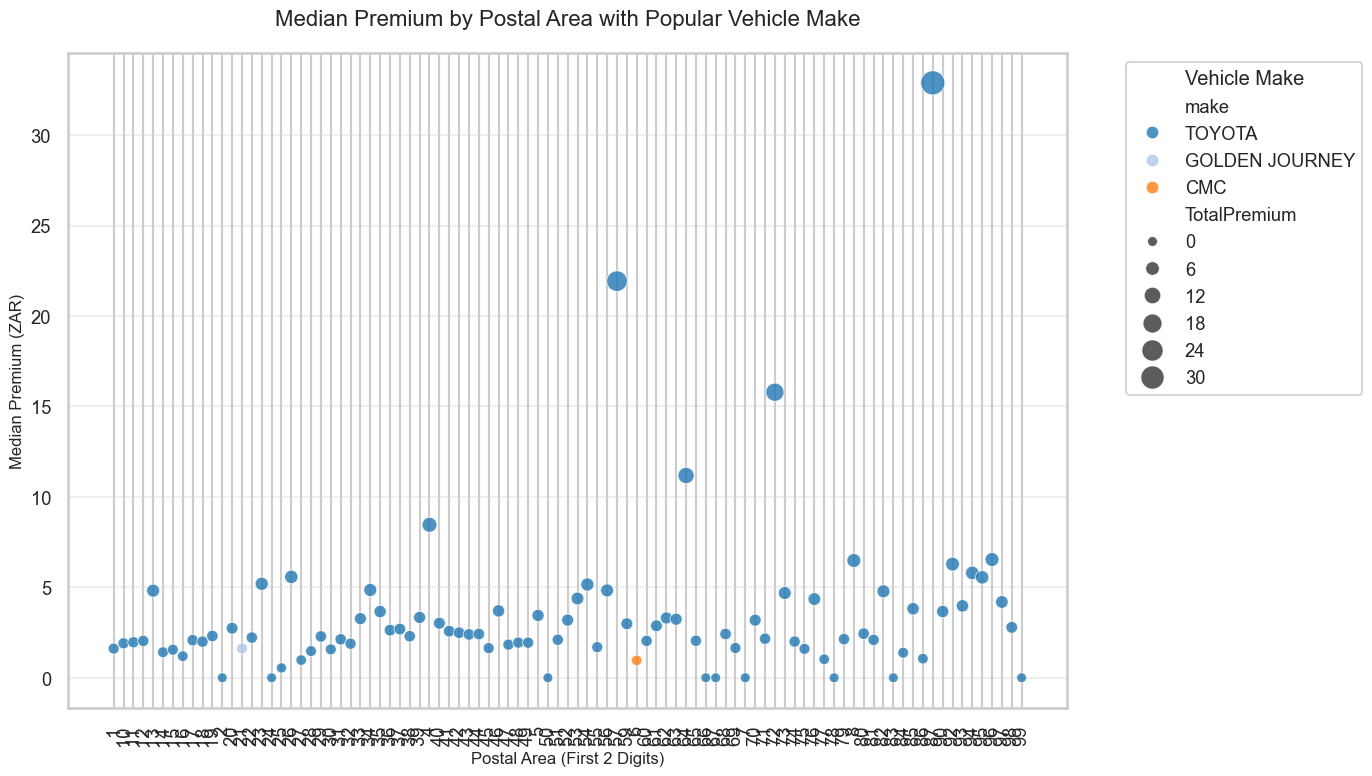

In [39]:
# Postal Code Analysis 
plt.figure(figsize=(14, 8))

# Extract first 2 digits of postal code
df['PostalArea'] = df['PostalCode'].astype(str).str[:2]

# Filter for meaningful visualization
postal_data = df[df['PostalArea'].str.isnumeric()].groupby('PostalArea').agg({
    'TotalPremium': 'median',
    'make': lambda x: x.mode()[0]
}).reset_index()

# Create bubble plot
sns.scatterplot(data=postal_data,
               x='PostalArea',
               y='TotalPremium',
               size='TotalPremium',
               sizes=(50, 300),
               hue='make',
               palette='tab20',
               alpha=0.8)

plt.title('Median Premium by Postal Area with Popular Vehicle Make', fontsize=16, pad=20)
plt.xlabel('Postal Area (First 2 Digits)', fontsize=12)
plt.ylabel('Median Premium (ZAR)', fontsize=12)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), title='Vehicle Make')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('../outputs/medianPremium_by_postalarea_with_vehiclemake.png', dpi=600)
plt.show()

C:\Users\fre\AppData\Local\Temp\ipykernel_17400\1107207483.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


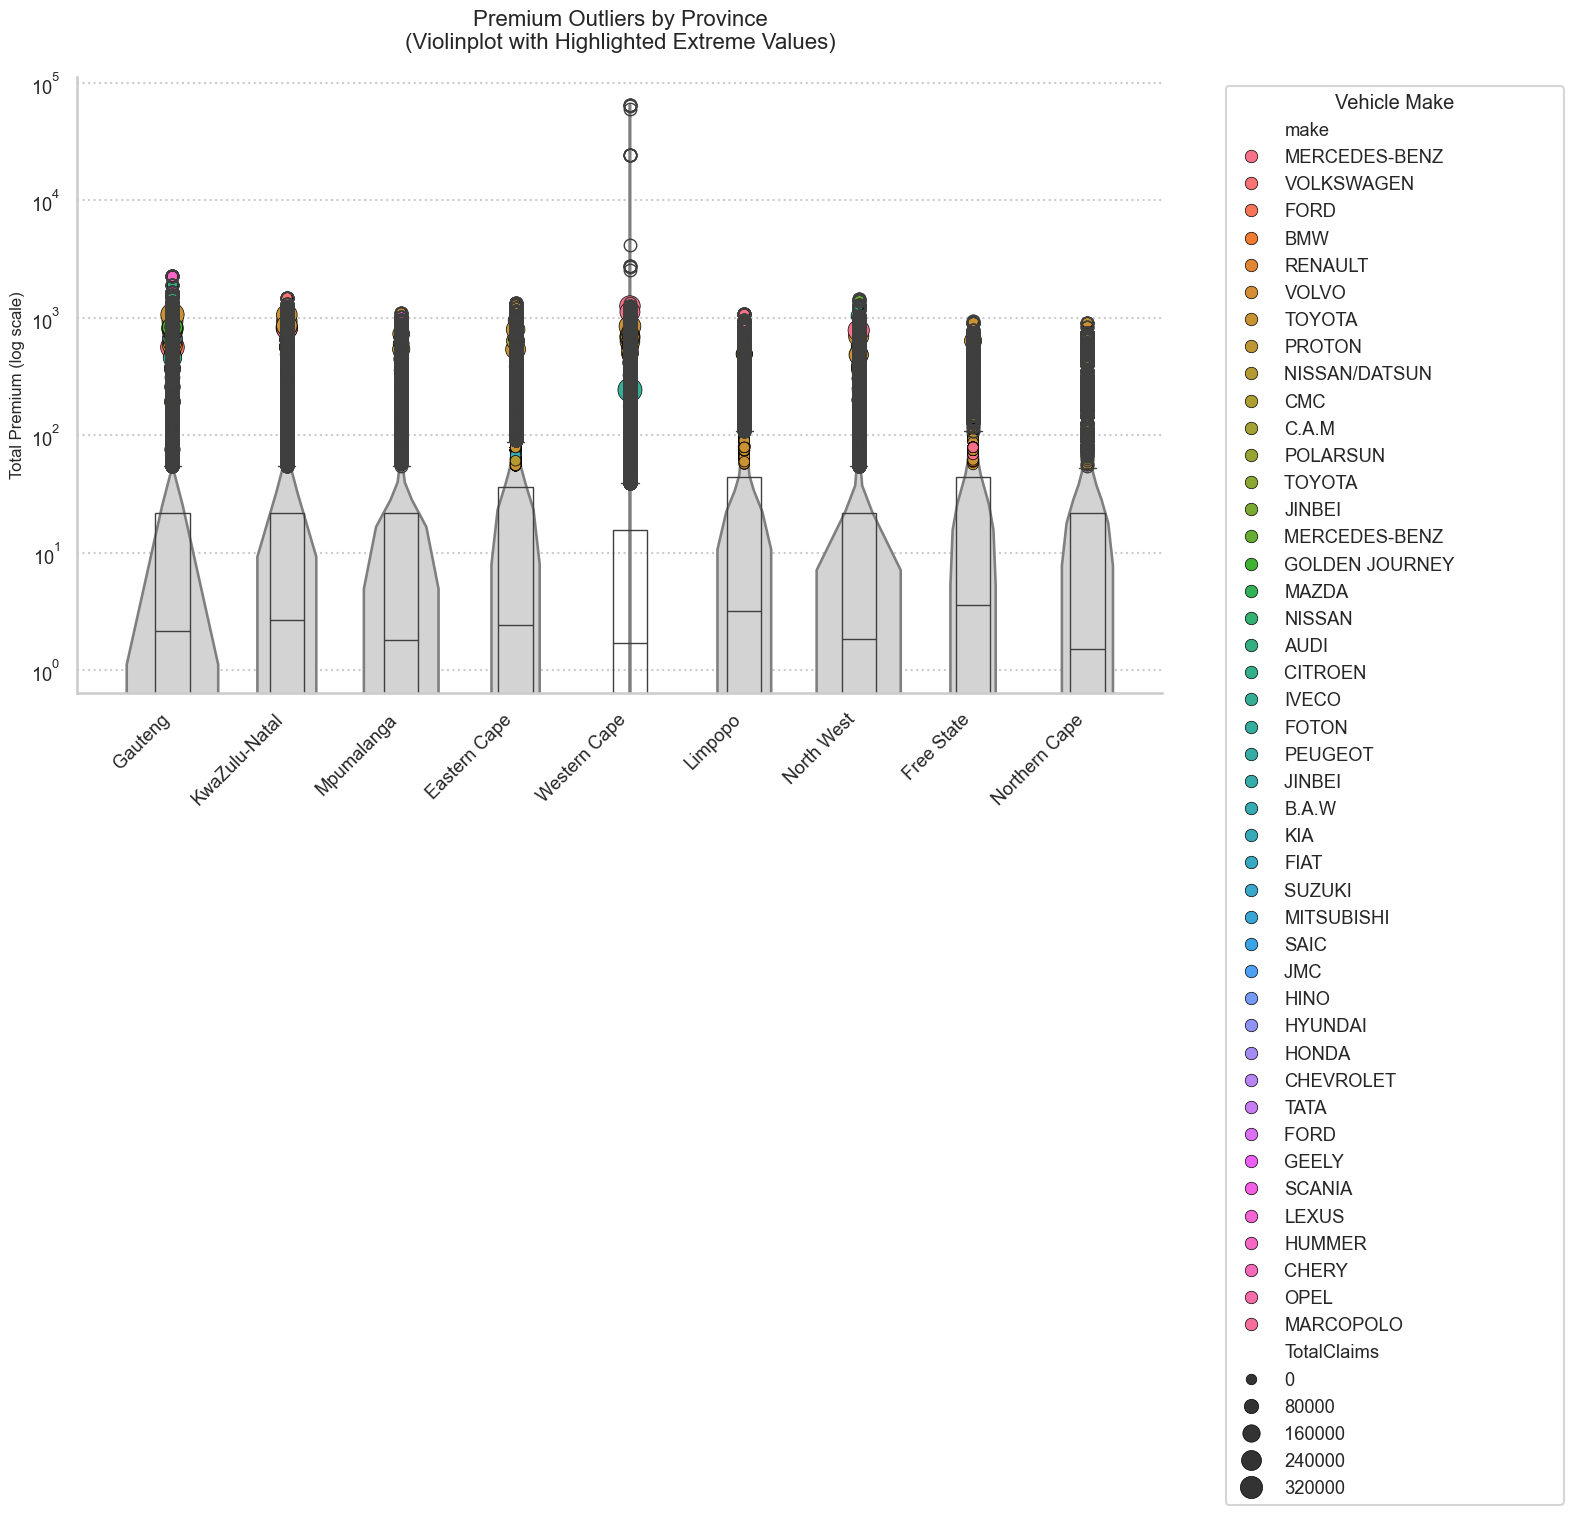

In [41]:
plt.figure(figsize=(14, 8))

# Calculate IQR bounds for TotalPremium
Q1 = df['TotalPremium'].quantile(0.25)
Q3 = df['TotalPremium'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Create highlight mask
df['Outlier'] = (df['TotalPremium'] < lower_bound) | (df['TotalPremium'] > upper_bound)

# Create plot
ax = sns.violinplot(x='Province', y='TotalPremium', data=df,
                   inner=None, color='lightgray')
sns.boxplot(x='Province', y='TotalPremium', data=df,
           width=0.3, boxprops={'facecolor':'None'},
           whiskerprops={'linewidth':0})

# Highlight outliers
outliers = df[df['Outlier']]
sns.scatterplot(data=outliers, x='Province', y='TotalPremium',
               hue='make', size='TotalClaims',
               sizes=(50, 300), palette='husl',
               legend='brief', edgecolor='black',
               linewidth=0.5)

plt.title('Premium Outliers by Province\n(Violinplot with Highlighted Extreme Values)', fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Total Premium (log scale)', fontsize=12)
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), title='Vehicle Make')
sns.despine()
plt.tight_layout()

plt.savefig('../outputs/premium_outlier_by_province.png', dpi=600)
plt.show()

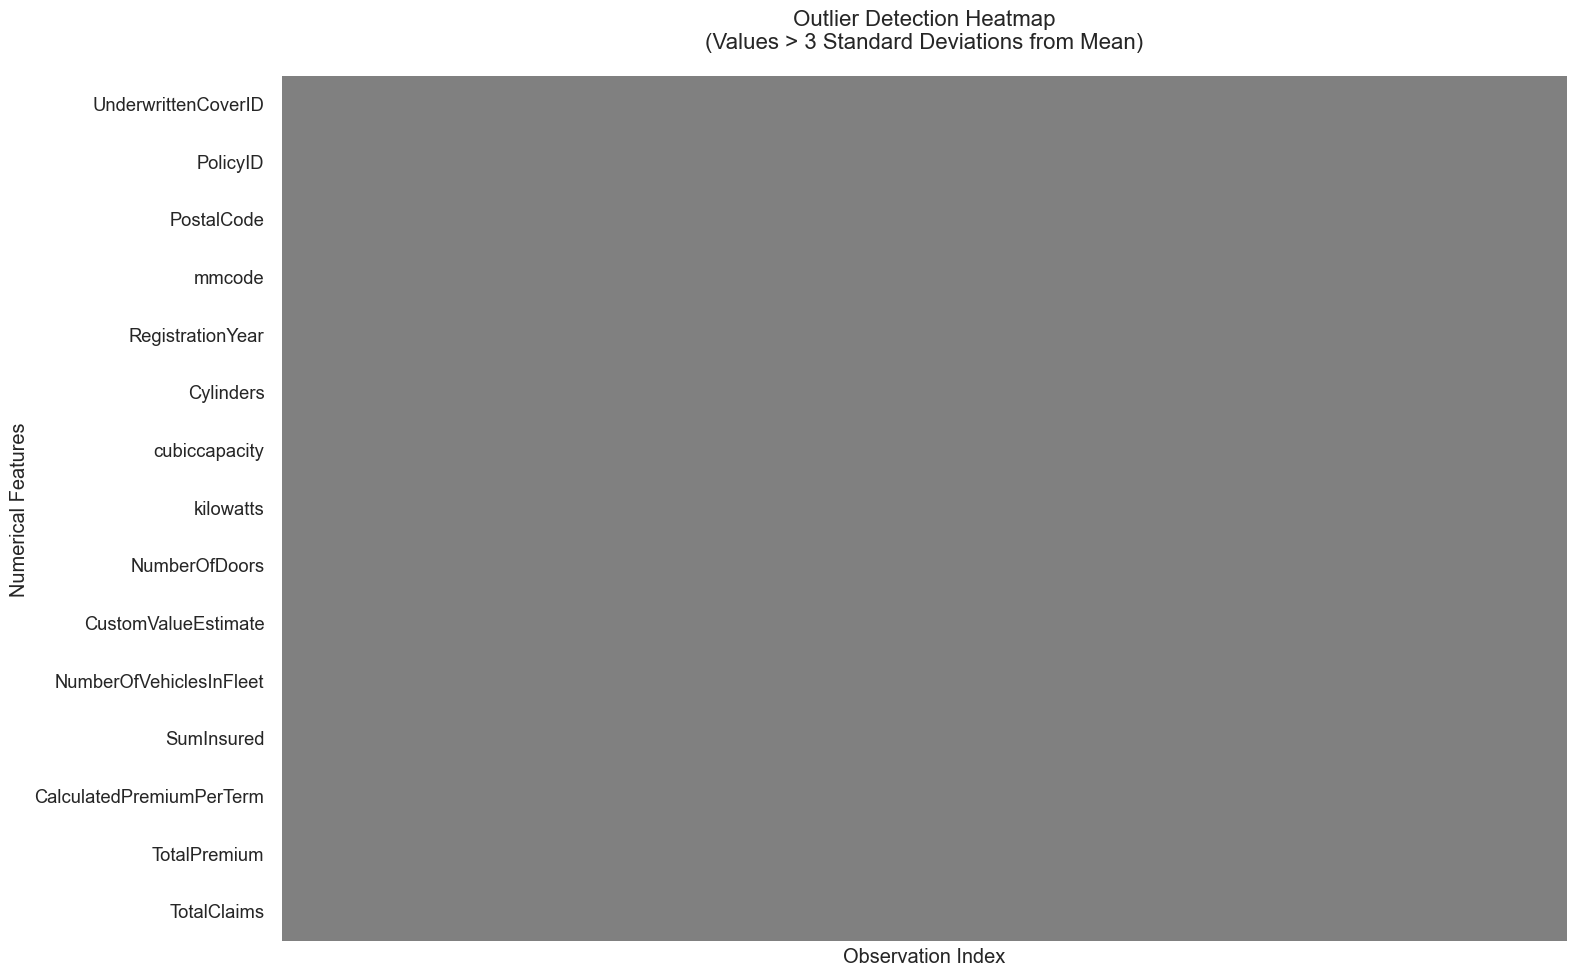

In [43]:
plt.figure(figsize=(16, 10))

# Calculate outlier flags for all numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
outliers = ((numeric_df - numeric_df.mean()) / numeric_df.std()).abs() > 3

# Create heatmap
sns.heatmap(outliers.T, cmap='YlOrRd', cbar=False,
           linewidths=0.5, linecolor='gray')

plt.title('Outlier Detection Heatmap\n(Values > 3 Standard Deviations from Mean)', 
         fontsize=16, pad=20)
plt.xlabel('Observation Index')
plt.ylabel('Numerical Features')
plt.xticks([])
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig('../outputs/outlier_detection_heatmap.png', dpi=600)
plt.show()